# Подключение гугл диска

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Импорт библиотек

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import numpy as np
from scipy. stats import pearsonr

# Загрузка данных

In [ ]:
# Чтобы выполнить загрузку, нужно положить данные на свой гугл диск
data = pd.read_csv('/content/drive/MyDrive/games.csv', sep=',')

In [ ]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Заменим заглавные буквы в названиях столбцов на строчные.

In [ ]:
data.columns = map(str.lower, data.columns)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


# Предобработка

## Сведение

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Пропуски

Выведем полную информацию о датафрейме

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Видно, что некоторые из признаков имеют пропуски. Рассмотрим их по очереди.

Рассмотрим critic_score

In [ ]:
data['critic_score']

0        76.0
1         NaN
2        82.0
3        80.0
4         NaN
         ... 
16710     NaN
16711     NaN
16712     NaN
16713     NaN
16714     NaN
Name: critic_score, Length: 16715, dtype: float64

Педположим, что игры, не имеющие оценки критиков - игры на уровне "не хорошо, не плохо". Присвоим им значение 50 из 100.

In [ ]:
data['critic_score'] = data['critic_score'].fillna(50.0)
data['critic_score']

0        76.0
1        50.0
2        82.0
3        80.0
4        50.0
         ... 
16710    50.0
16711    50.0
16712    50.0
16713    50.0
16714    50.0
Name: critic_score, Length: 16715, dtype: float64

Рассмотрим user_score

In [ ]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видно, что помимо оценок есть пропущенные значения и значения tbd. Полагая, что tbd - to be detected, можно предположить, что игры находятся на этапе сбора оценок. Разделим данные с оценками и с tbd на два датафрейма.

In [ ]:
data_tbd = data[data['user_score'] == 'tbd']
data1 = data[data['user_score'] != 'tbd']
data1

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,50.0,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,50.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,50.0,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,50.0,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,50.0,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,50.0,NaN,NaN


Учитывая, что в дальнейшем нам надо будет рассматривать user_score в гипотезах, задавать пропущенные значения не имеет смысла. На данном этапе приведем тип object к float64 для данного признака.

In [ ]:
data1.loc[:,'user_score'] = pd.to_numeric(data1['user_score'], errors='coerce')
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14291 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14289 non-null  object 
 1   platform         14291 non-null  object 
 2   year_of_release  14070 non-null  float64
 3   genre            14289 non-null  object 
 4   na_sales         14291 non-null  float64
 5   eu_sales         14291 non-null  float64
 6   jp_sales         14291 non-null  float64
 7   other_sales      14291 non-null  float64
 8   critic_score     14291 non-null  float64
 9   user_score       7590 non-null   float64
 10  rating           7575 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.3+ MB


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Далее рассмотрим name. Есть две строки без названия, зададим их.

In [ ]:
data1[data1['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,50.0,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,50.0,NaN,NaN


In [ ]:
data1.loc[659, 'name'] = 'name1'
data1.loc[14244, 'name'] = 'name2'

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14291 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14291 non-null  object 
 1   platform         14291 non-null  object 
 2   year_of_release  14070 non-null  float64
 3   genre            14289 non-null  object 
 4   na_sales         14291 non-null  float64
 5   eu_sales         14291 non-null  float64
 6   jp_sales         14291 non-null  float64
 7   other_sales      14291 non-null  float64
 8   critic_score     14291 non-null  float64
 9   user_score       7590 non-null   float64
 10  rating           7575 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.8+ MB


Теперь рассмотрим жанр. Видно, что есть некоторые игры, у которых жанр не определен. Зададим пропущенный жанр как "другой".

In [ ]:
data1[data1['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,name1,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,50.0,NaN,NaN
14244,name2,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,50.0,NaN,NaN


In [ ]:
data1['genre'] = data1['genre'].fillna('Other')

<ipython-input-160-abaf8456c741>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['genre'] = data1['genre'].fillna('Other')


Пропущенный рейтинг заменим на "ND" - not determined.

In [ ]:
data1['rating'] = data1['rating'].fillna('ND')

<ipython-input-161-fdb4ad137f89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['rating'] = data1['rating'].fillna('ND')


In [ ]:
data1['year_of_release'].isnull().sum()

221

Год релиза может быть пропущен. По условию дата не должна быть в обучении, но пригодилось бы для ранжирования объектов (чтобы в валидационную выборку закидывать самые новые релизы). На данном этапе не будем рассматривать игры с пропущенным годом релиза.

In [ ]:
data2 = data1[data1['year_of_release'].notnull()]

In [ ]:
data2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,50.0,NaN,ND
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,50.0,NaN,ND
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,50.0,NaN,ND
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,50.0,NaN,ND
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,50.0,NaN,ND
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,50.0,NaN,ND


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14070 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14070 non-null  object 
 1   platform         14070 non-null  object 
 2   year_of_release  14070 non-null  float64
 3   genre            14070 non-null  object 
 4   na_sales         14070 non-null  float64
 5   eu_sales         14070 non-null  float64
 6   jp_sales         14070 non-null  float64
 7   other_sales      14070 non-null  float64
 8   critic_score     14070 non-null  float64
 9   user_score       7463 non-null   float64
 10  rating           14070 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.3+ MB


Найдем продажи в сумме.

In [ ]:
data2['sales'] = data1['eu_sales'] + data1['jp_sales'] + data1['na_sales'] + data1['other_sales']
data2

<ipython-input-164-d29f056b718d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['sales'] = data1['eu_sales'] + data1['jp_sales'] + data1['na_sales'] + data1['other_sales']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,50.0,NaN,ND,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,50.0,NaN,ND,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,50.0,NaN,ND,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,50.0,NaN,ND,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,50.0,NaN,ND,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,50.0,NaN,ND,0.01


Посмотрим, сколько игр выпускалось в разные годы.

In [ ]:
years = data2['year_of_release'].unique()
years

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

In [ ]:
games = dict()
for year in years:
  games[year] = len(data2[data2['year_of_release'] == year])
games

{2006.0: 882,
 1985.0: 14,
 2008.0: 1101,
 2009.0: 1021,
 1996.0: 263,
 1989.0: 17,
 1984.0: 14,
 2005.0: 818,
 1999.0: 330,
 2007.0: 1005,
 2010.0: 924,
 2013.0: 529,
 2004.0: 655,
 1990.0: 16,
 1988.0: 15,
 2002.0: 637,
 2001.0: 400,
 2011.0: 919,
 1998.0: 379,
 2015.0: 568,
 2012.0: 629,
 2014.0: 560,
 1992.0: 43,
 1997.0: 288,
 1993.0: 62,
 1994.0: 121,
 1982.0: 36,
 2016.0: 468,
 2003.0: 680,
 1986.0: 21,
 2000.0: 307,
 1995.0: 219,
 1991.0: 41,
 1981.0: 46,
 1987.0: 16,
 1980.0: 9,
 1983.0: 17}

Как говорилось выше, для прогноза понадобятся не все данные. Для наиболее точных прогнозов логично использовать данные за последние годы.

Посмотрим, как менялись продажи по платформам.

In [ ]:
platforms = data2['platform'].unique()
sales = dict()
for platform in platforms:
  sales[platform] = data2['sales'][data2['platform'] == platform].sum()
sales

{'Wii': 791.91,
 'NES': 251.05,
 'GB': 254.42999999999998,
 'DS': 655.36,
 'X360': 948.7400000000001,
 'PS3': 921.0899999999999,
 'PS2': 1171.19,
 'SNES': 200.04000000000002,
 'GBA': 263.70000000000005,
 'PS4': 314.0,
 '3DS': 253.24,
 'N64': 218.00999999999996,
 'PS': 714.2599999999999,
 'XB': 236.38,
 'PC': 252.24999999999997,
 '2600': 86.47999999999998,
 'PSP': 273.11,
 'XOne': 158.77000000000004,
 'WiiU': 81.78999999999999,
 'GC': 185.68,
 'GEN': 30.77,
 'DC': 15.95,
 'PSV': 53.5,
 'SAT': 33.59,
 'SCD': 1.8600000000000003,
 'WS': 1.42,
 'NG': 1.4400000000000002,
 'TG16': 0.16,
 '3DO': 0.1,
 'GG': 0.04,
 'PCFX': 0.03}

Выведем максимальные продажи по платформам и построим для них распределение по годам.

In [ ]:
max_sales = {key: value for key, value in sales.items() if value > 500}
max_sales

{'Wii': 791.91,
 'DS': 655.36,
 'X360': 948.7400000000001,
 'PS3': 921.0899999999999,
 'PS2': 1171.19,
 'PS': 714.2599999999999}

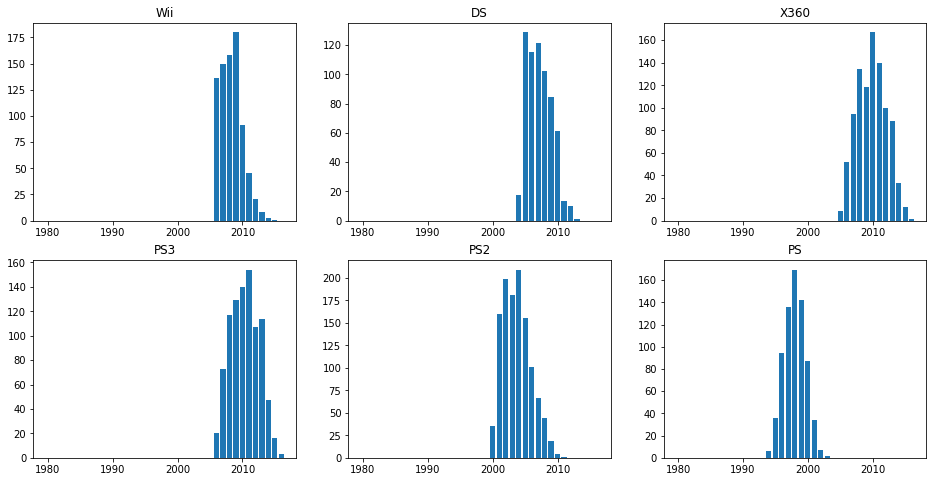

In [ ]:
sale = dict()
sale_in_year = dict()
figure, axis = plt.subplots(2, 3, figsize=(16, 8))
x = 0
y = 0
for platform in max_sales.keys():
  data3 = data2[data2['platform'] == platform]
  sale_in_year = dict()
  for year in years:
    sale_in_year[year] = data3.loc[data3['year_of_release'] == year, 'sales'].sum()
  axis[x, y].set_title(platform)
  axis[x, y].bar(*zip(*sale_in_year.items()))
  y += 1
  if y == 3:
    y = 0
    x += 1

Судя по графикам, платформы являются популярными примерно десять лет. Можно сказать, что основной пик популярности платформ пришел на 2010 годы. Видно, что после этого года прибыльность платформ снижается. Далее будем рассматривать "Wii", "DS", "X360" и "PS3". С годами прибыльность всех платформ снижается. Актуальным периодом выберем 2003-2015 годы.

Для "Wii", "DS", "X360" и "PS3" построим "ящики с усами" в периоде с 2003 по 2015 годы.

In [ ]:
data2 = data2[data2['year_of_release'] > 2003]
data2 = data2[data2['year_of_release'] < 2015]

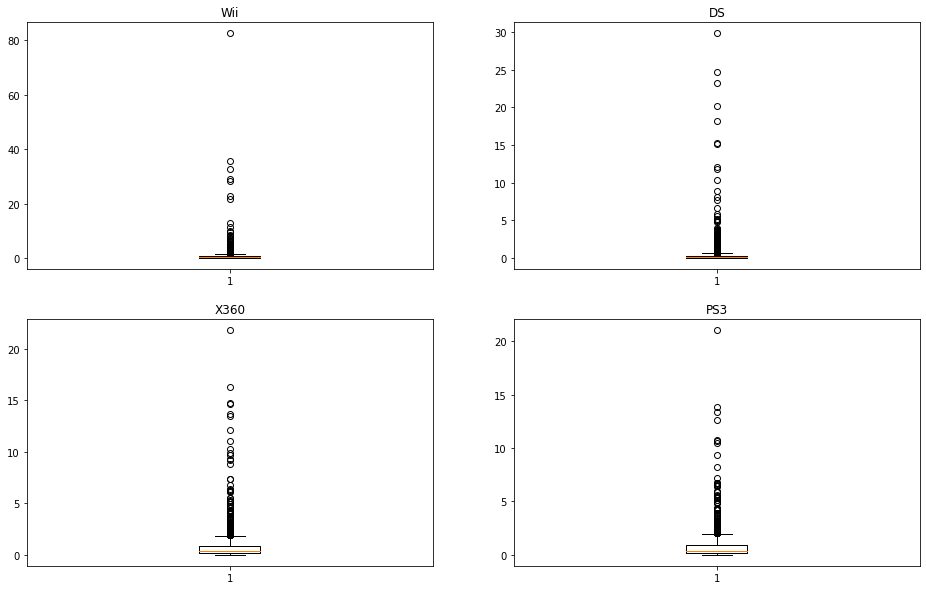

In [ ]:
platforms = ["Wii", "DS", "X360", "PS3"]

sale_in_year = dict()
figure, axis = plt.subplots(2, 2, figsize=(16, 10))
x = 0
y = 0
for platform in platforms:
  axis[x, y].set_title(platform)
  axis[x, y].boxplot(data2['sales'][data2['platform'] == platform])
  y += 1
  if y == 2:
    y = 0
    x += 1

Из графиков видно, что среднее значение лежит ниже максимальных значений по продажам. Значит, что высокие показатели были скорее редкостью, чем стабильными показателями.

Посмотрим, как вляют отзывы пользователей и критиков на продажи на примере PS3.

In [ ]:
data3 = data2[data2['platform'] == 'PS3']
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1125 entries, 16 to 16676
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1125 non-null   object 
 1   platform         1125 non-null   object 
 2   year_of_release  1125 non-null   float64
 3   genre            1125 non-null   object 
 4   na_sales         1125 non-null   float64
 5   eu_sales         1125 non-null   float64
 6   jp_sales         1125 non-null   float64
 7   other_sales      1125 non-null   float64
 8   critic_score     1125 non-null   float64
 9   user_score       826 non-null    float64
 10  rating           1125 non-null   object 
 11  sales            1125 non-null   float64
dtypes: float64(8), object(4)
memory usage: 114.3+ KB


Видно, что есть случаи, когда не собраны отзывы пользователей. Не будем рассматривать случаи без оценки.

In [ ]:
data3 = data3[data3['user_score'].notnull()]
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 826 entries, 16 to 16230
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             826 non-null    object 
 1   platform         826 non-null    object 
 2   year_of_release  826 non-null    float64
 3   genre            826 non-null    object 
 4   na_sales         826 non-null    float64
 5   eu_sales         826 non-null    float64
 6   jp_sales         826 non-null    float64
 7   other_sales      826 non-null    float64
 8   critic_score     826 non-null    float64
 9   user_score       826 non-null    float64
 10  rating           826 non-null    object 
 11  sales            826 non-null    float64
dtypes: float64(8), object(4)
memory usage: 83.9+ KB


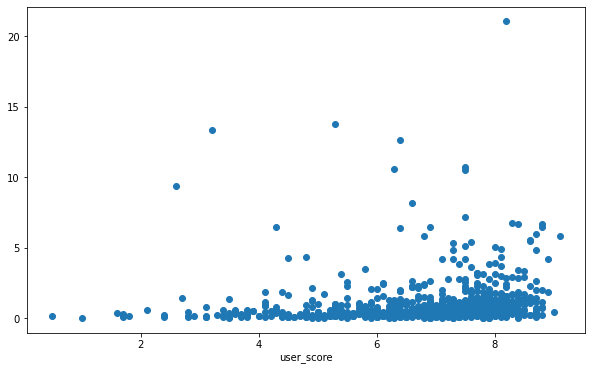

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = data3['user_score'], y = data3['sales'])
plt.xlabel("user_score")
plt.show()

Как видно на графике, оценка пользователей не коррелирует с продажами. Проверим это, посчитав корреляцию.

In [ ]:
pearsonr(data3['user_score'], data3['sales'])

(0.12555911416316942, 0.000297512635946939)

Действительно, коэффициент корреляции Пирсона получился менее 0.3, значит связь признака и таргета слабая, но не смотря на это является статистически значимой.

Проверим связь оценки критиков и продаж.

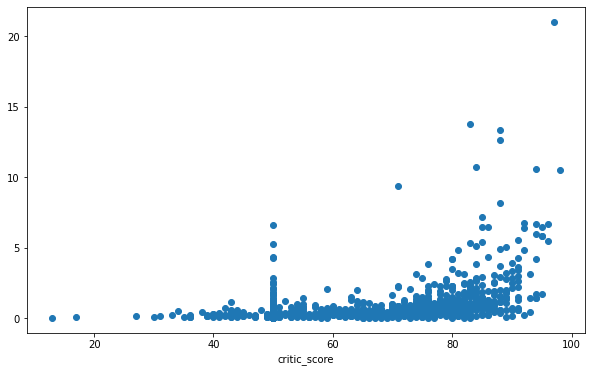

In [ ]:
data3 = data2[data2['platform'] == 'PS3']
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = data3['critic_score'], y = data3['sales'])
plt.xlabel("critic_score")
plt.show()

На графике видно, оценка критиков слабо коррелирует с продажами. Проверим это, посчитав корреляцию.

In [ ]:
pearsonr(data3['critic_score'], data3['sales'])

(0.4465230607074974, 3.1502865156817883e-56)

Действительно, коэффициент получился больше 0.3, значит связь умеренная и является статистически значимой.

Продажи для PS3 были примерно сопоставимы с продажами на других популярных платформах, графики зависимостей продаж по годам были похожи. Можно сказать, что на других платформах связи между оценками критиков и пользователей и продажами будет соответствовать связям для PS3.

Рассмотрим, влияет ли жанр на продажи.

In [ ]:
genres = data2['genre'].unique()
genres

array(['Sports', 'Racing', 'Platform', 'Misc', 'Simulation', 'Action',
       'Role-Playing', 'Puzzle', 'Shooter', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

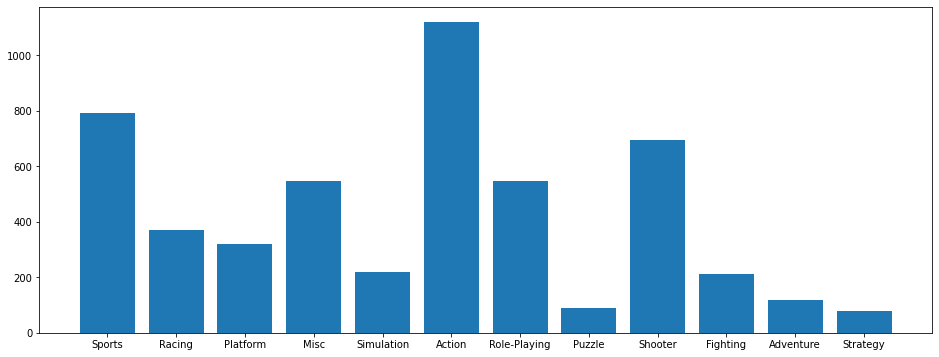

In [ ]:
sale_in_genre = dict()
plt.figure(figsize=(16,6))
for genre in genres:
  sale_in_genre[genre] = data2.loc[data2['genre'] == genre, 'sales'].sum()
plt.bar(*zip(*sale_in_genre.items()))
plt.show()

Как видно на графике, топ-5 популярных жанров это: 'Action', 'Sports', 'Shooter', 'Misc', 'Role-Playing'.  Наиболее низкие продажи имеют игры с жанрами:  'Simulation', 'Fighting', 'Adventure', 'Puzzle', 'Strategy'.

Для пользователя каждого региона определим самые популярные платформы (топ-5).

In [ ]:
platforms = data2['platform'].unique()
na_sales_sum = dict()
eu_sales_sum = dict()
jp_sales_sum = dict()
for platform in platforms:
  na_sales_sum[platform] = data2.loc[data2['platform'] == platform, 'na_sales'].sum()
  eu_sales_sum[platform] = data2.loc[data2['platform'] == platform, 'eu_sales'].sum()
  jp_sales_sum[platform] = data2.loc[data2['platform'] == platform, 'jp_sales'].sum()

print('top-5 platform for jp:\n', sorted(jp_sales_sum.items(), key=lambda kv: kv[1], reverse=True)[:5])
print('\ntop-5 platform for eu:\n', sorted(eu_sales_sum.items(), key=lambda kv: kv[1], reverse=True)[:5])
print('\ntop-5 platform for na:\n', sorted(na_sales_sum.items(), key=lambda kv: kv[1], reverse=True)[:5])

top-5 platform for jp:
 [('DS', 171.51999999999998), ('3DS', 76.89), ('PSP', 75.44), ('PS3', 74.35), ('PS2', 69.99)]

top-5 platform for eu:
 [('PS3', 318.03), ('X360', 262.71), ('Wii', 241.17), ('DS', 157.54000000000002), ('PS2', 129.51000000000002)]

top-5 platform for na:
 [('X360', 577.97), ('Wii', 412.75), ('PS3', 378.27000000000004), ('DS', 279.06), ('PS2', 278.46999999999997)]


Как и ожидалось, в разных регионах популярны разные платформы, однако есть лидеры, которые занимают высшие позиции не смотря на регион. Это 'X360' - имеет сумарные продажи по na и eu выше 800, 'PS3' - более 700 и 'DS" - более 600 по всем регионам. 

Посмотрим на рейтинг жанров по регионам.

In [ ]:
na_sales_sum = dict()
eu_sales_sum = dict()
jp_sales_sum = dict()
for genre in genres:
  na_sales_sum[genre] = data2.loc[data2['genre'] == genre, 'na_sales'].sum()
  eu_sales_sum[genre] = data2.loc[data2['genre'] == genre, 'eu_sales'].sum()
  jp_sales_sum[genre] = data2.loc[data2['genre'] == genre, 'jp_sales'].sum()

print('top-5 genre for jp:\n', sorted(jp_sales_sum.items(), key=lambda kv: kv[1], reverse=True)[:5])
print('\ntop-5 genre for eu:\n', sorted(eu_sales_sum.items(), key=lambda kv: kv[1], reverse=True)[:5])
print('\ntop-5 genre for na:\n', sorted(na_sales_sum.items(), key=lambda kv: kv[1], reverse=True)[:5])

top-5 genre for jp:
 [('Role-Playing', 179.34), ('Action', 89.25), ('Misc', 71.02000000000001), ('Sports', 54.63), ('Platform', 40.79)]

top-5 genre for eu:
 [('Action', 341.24), ('Sports', 240.79999999999998), ('Shooter', 219.99), ('Misc', 154.23), ('Racing', 131.80999999999997)]

top-5 genre for na:
 [('Action', 548.14), ('Sports', 402.53000000000003), ('Shooter', 379.68), ('Misc', 264.7), ('Role-Playing', 211.48000000000002)]


Судя по полученным продажам по регионам, самым популярным жанром по миру является Action, что соответствует графику. Однако в jp большую популярность имеет Role-Playing, возможно там более творческие люди, которым нравится ассоциировать себя с персонажами любимых игр. Этот вывод соответствует популярности косплея в Японии.

Посмотрим на зависимость рейтинга ESRB на продажи в разных регионах. Для этого закодируем рейтинг.

In [ ]:
data2['rating_codes'] = data.rating.astype('category').cat.codes
data2.rating_codes.unique()

array([ 1, -1,  5,  7,  2,  0,  3,  6], dtype=int8)

In [ ]:
print('dependence for na ', pearsonr(data2['rating_codes'], data2['na_sales']))
print('dependence for eu ', pearsonr(data2['rating_codes'], data2['eu_sales']))
print('dependence for jp ', pearsonr(data2['rating_codes'], data2['jp_sales']))

dependence for na  (0.10366634808496374, 4.913982411769928e-23)
dependence for eu  (0.07490158079244556, 9.908115408101805e-13)
dependence for jp  (-0.04995781396078912, 2.003867214041832e-06)


Видно, что для всех регионов зависимости слабые, однако статистически значимые.

Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые с помощью двухвыборочный t-критерия. Выбираем этот критерий, так как дисперсии выборок равны.

Примем за гипотезу H0 - что средние рейтинги равны, а за гипотезу H1 - не равны. Пороговое значение alpha = 0.05

In [ ]:
data3 = data1[data1['user_score'].notnull()]
stats.ttest_ind(a=data3['user_score'][data3['platform'] == 'XOne'], b = data3['user_score'][data3['platform'] == 'PC']) 

Ttest_indResult(statistic=-4.368333815003015, pvalue=1.3896435533548819e-05)

Так как pvalue много меньше alpha = 0.05 нулевая гипотеза отвергается, то есть для данных платформ пользовательские рейтинги не равны.

Теперь проверим гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Проверять будем также t-тестом, но с условием, что дисперсии выборок не равны.

За H0-гипотезу принимаем, что средние рейтинги равны, за H1 - что они не равны.

In [ ]:
stats.ttest_ind(a=data3['user_score'][data3['genre'] == 'Action'], b = data3['user_score'][data3['genre'] == 'Sports'], equal_var = False)

Ttest_indResult(statistic=1.57746791633354, pvalue=0.11483818791498286)

p-value получилось больше 0.05, а значит, мы не можем отвергнуть нулевую гипотезу теста.

# Вывод

По итогам предобработки и анализу данных можно сказать, что для качественного прогноза может не хватать данных об оценках критиков, но их влияние на прогноз оценок пользователей не является существенным. Так же можно сказать, что зависимости интересов пользователей от платформ и жанров можно проследить и на этих данных.